In [2]:
import random
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from itertools import compress

# Bokeh imports
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure, output_file, ColumnDataSource, reset_output
from bokeh.models import HoverTool
output_notebook()

from ipywidgets.widgets import Text

#scipy constants
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as NA
from scipy.constants import Planck as h
from scipy.constants import speed_of_light as c0
from scipy.constants import R

sys.path.append('../CNT-SIM/')
from CNTSimFile import CNTSimFile
from mc_sim import exciton_sim

Loading BokehJS ...

In [3]:
k_er_per_s = 1e8
k_br_per_s = 1e8  # constant for radiativ decay from S11*
k_enr_per_s = 2e8 
k_bnr_per_s = 4e8   # constant for non-radiativ decay from S11*

k_de_per_s = 1e8  # constant for going from dark to S11 state
k_ed_per_s = 1e8  # constant for going from S11 to dark statestate

# termal detrapping 10.1021/acs.jpclett.8b03732
k_bd_per_s = 0.5 * (1e12 / 385 + 1e12 / 1132) + 0.1e12 * np.exp(-1.6182e-11 /
                                                                (kB * 300))
k_dnr_per_s = 2e8

kin_const_1 = np.array([k_br_per_s, k_er_per_s, k_bnr_per_s, k_enr_per_s, k_bd_per_s, k_ed_per_s,
                        k_de_per_s, k_dnr_per_s])

In [4]:
files = os.listdir(r"../sim_output/"
                   )
files = [r'../sim_output/' + f
         for f in files if '2020-10-01'
         in f if f.endswith('.h5')]

In [5]:
import re
import pprint
def natural_key(string_):
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

In [6]:
def last_num_key(string_):
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_.strip())][-4]

In [7]:
files = sorted(files, key=last_num_key)
pprint.pprint(files)

['../sim_output/2020-10-01-exciton_sim-ker_kbnr_diff_prist_1.h5',
 '../sim_output/2020-10-01-exciton_sim-ker_kbnr_diff_defect_2.h5',
 '../sim_output/2020-10-01-exciton_sim-ker_kbnr_diff_prist_3.h5',
 '../sim_output/2020-10-01-exciton_sim-ker_kbnr_diff_defect_4.h5',
 '../sim_output/2020-10-01-exciton_sim-ker_kbnr_diff_prist_5.h5',
 '../sim_output/2020-10-01-exciton_sim-ker_kbnr_diff_defect_6.h5',
 '../sim_output/2020-10-01-exciton_sim-ker_kbnr_diff_prist_7.h5',
 '../sim_output/2020-10-01-exciton_sim-ker_kbnr_diff_defect_8.h5']


In [8]:
sims = [CNTSimFile(i, kin_const_1) for i in files]

Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.


../CNT-SIM/CNTSimFile.py:31: UserWarning: File already exists, kinetic constants ingored.
  warn("File already exists, kinetic constants ingored.")


In [9]:
sims[0].calc_dict.keys()

dict_keys(['CNT_length', 'Diff_const', 'chosen_const', 'constant_array', 'constant_dependence', 'constant_names', 'date', 'function', 'method', 'n_defects', 'n_photons', 'r_exc_nm', 'ref_diff_const', 't_step'])

In [10]:
def plot_QY_prist(SimFile, chosen_const):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()
    ax2.set_xticks(SimFile.calc_dict['Diff_const'][:, 1])
    ax2.set_xlabel('D_e')
    ax1.plot(SimFile.calc_dict['constant_dependence'][:, 0], SimFile.QY[:, 1]*100, label='E11')
    ax1.set_xlabel(SimFile.calc_dict['chosen_const'][chosen_const])
    ax1.set_ylabel('QY / %')
    ax1.legend()
    plt.tight_layout()
    return fig

In [11]:
def plot_QY_defect(SimFile, chosen_const):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()
    ax2.set_xticks(SimFile.calc_dict['Diff_const'][:, 1])
    ax2.set_xlabel('D_e')
    ax1.plot(SimFile.calc_dict['constant_dependence'][:, 0], SimFile.QY[:, 0]*100, label='E11*')
    ax1.plot(SimFile.calc_dict['constant_dependence'][:, 0], SimFile.QY[:, 1]*100, label='E11')
    ax1.set_xlabel(SimFile.calc_dict['chosen_const'][chosen_const])
    ax1.set_ylabel('QY / %')
    ax1.legend()
    plt.tight_layout()
    return fig

## raise-ker-kbnr-Diff

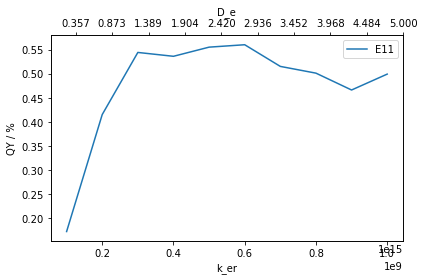

In [63]:
plot_QY_prist(sims[0], 0);

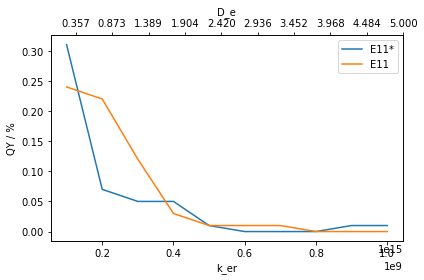

In [66]:
plot_QY_defect(sims[1], 0);

## k_er

In [13]:
sims[2].calc_dict['constant_dependence']

array([[1.0e+08, 4.0e+08],
       [1.2e+09, 8.0e+08],
       [2.3e+09, 1.2e+09],
       [3.4e+09, 1.6e+09],
       [4.5e+09, 2.0e+09],
       [5.6e+09, 2.4e+09],
       [6.7e+09, 2.8e+09],
       [7.8e+09, 3.2e+09],
       [8.9e+09, 3.6e+09],
       [1.0e+10, 4.0e+09]])

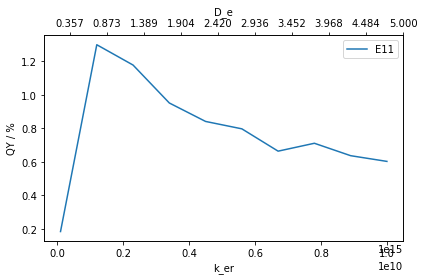

In [12]:
plot_QY_prist(sims[2], 0);

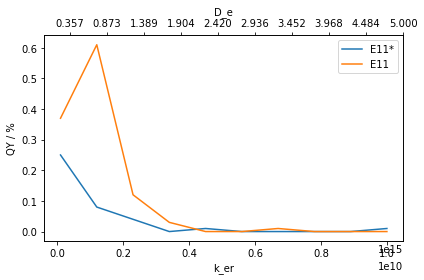

In [68]:
plot_QY_defect(sims[3], 0);

## k_bnr

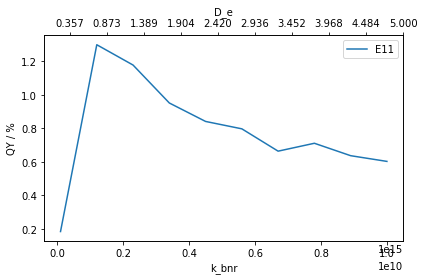

In [69]:
plot_QY_prist(sims[4], 1);

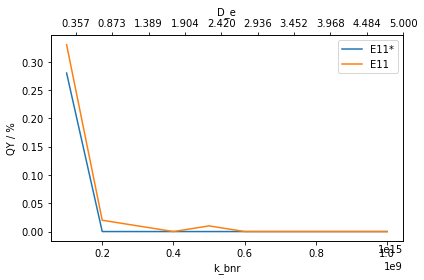

In [71]:
plot_QY_defect(sims[5], 1);

## Diff

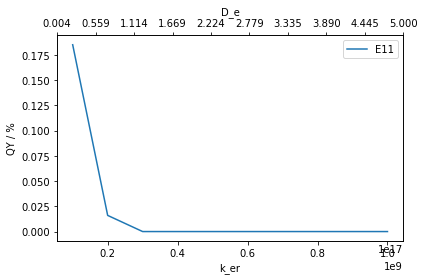

In [72]:
plot_QY_prist(sims[6], 0);

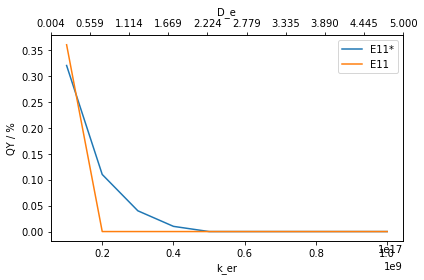

In [73]:
plot_QY_defect(sims[7], 0);